# Tugas
Mendeteksi orientasi teks dan jenis skrip

Instalasi dan Import Library

In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


In [3]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
def bgr_to_rgb(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def bgr_to_gray(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Preprocessing images dengan OpenCV

In [6]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Menampilkan Citra

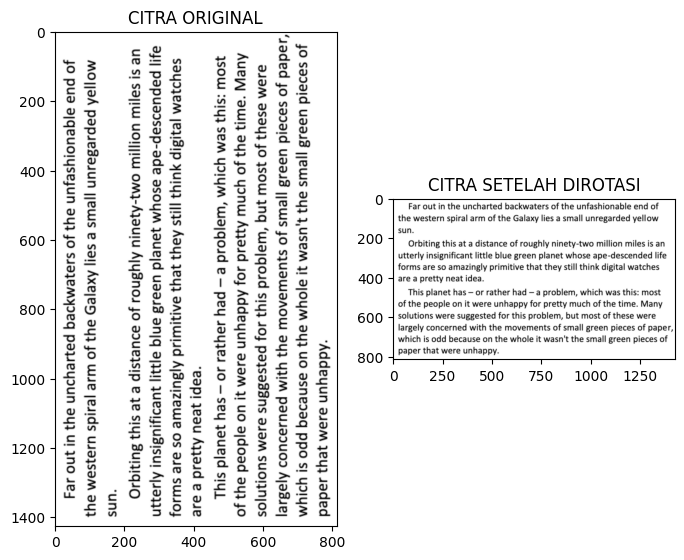

In [8]:
# Plot original image

image = cv2.imread('/content/drive/MyDrive/MACHINE-LEARNING/images/hitchhikers-rotated.png')
image_rotated = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
b,g,r = cv2.split(image_rotated)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(8,8))

plt.subplot(121), plt.imshow(image)
plt.title('CITRA ORIGINAL')

plt.subplot(122), plt.imshow(rgb_img)
plt.title('CITRA SETELAH DIROTASI')
plt.show()

In [9]:
# Preprocess image

gray = get_grayscale(image_rotated)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

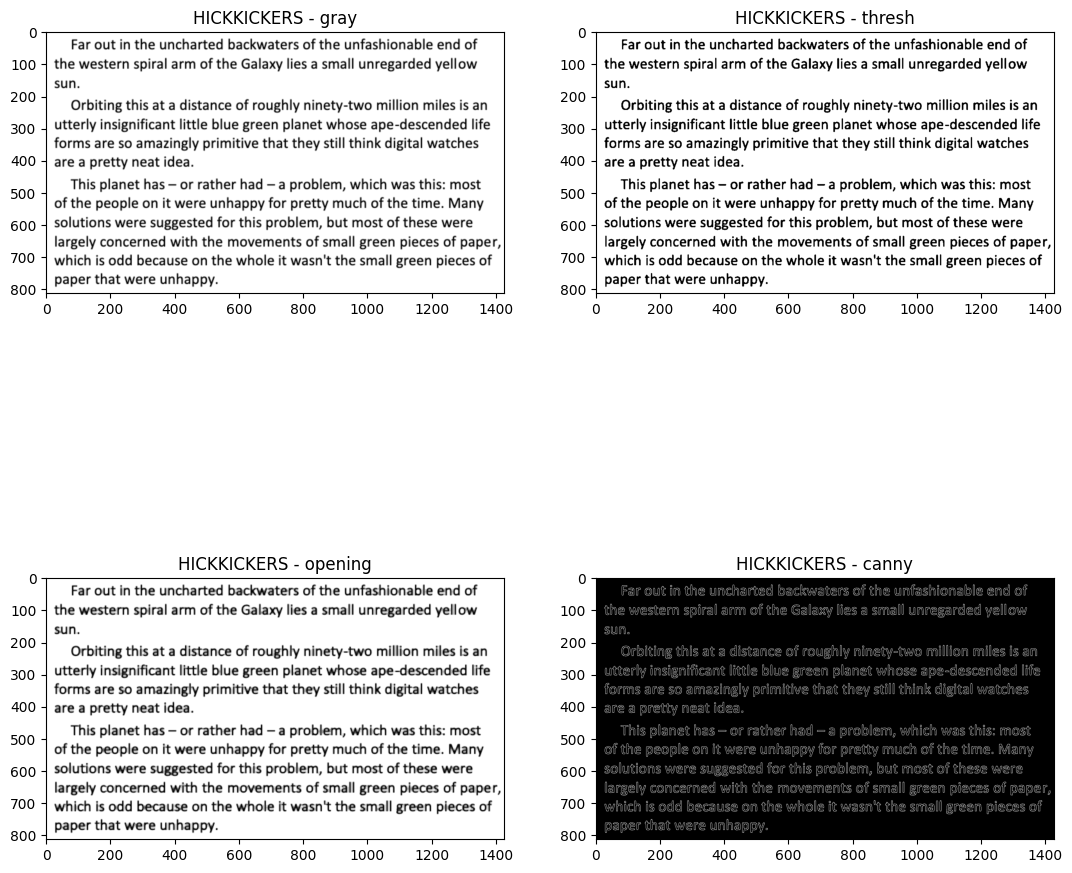

In [10]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('HICKKICKERS - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

Deteksi Skrip dengan Tesseract

1. Citra Original (Sebelum dirotasi)

In [11]:
custom_config = r'--oem 3 --psm 6'
script_type = pytesseract.image_to_string(image, config=custom_config)

print(f"Jenis Skrip:\n{script_type}")

Jenis Skrip:
-
w os
- St wu + 2 a °
oe = @ YOoOg on
°o Yue ome cqw
T= wn Vo ESve @G
oY ota wo SF OS
— nw
vo Eos ceee¢oe
= oOo _ En y
a oO a a + = o oO
so Caf or coc UVa
o Oo pa
Co = 9 & S2o2°% Mw
S$ Ee0 ZS 3 Es
ws a x Stuaé
£5 Qwest feo OMG
c Sus Soe
S= #388 SER?
fs FSS EEBER
Sa vo; YV>m ae
Oo w ce OU G o
gy 2 +A2S aanvs
= a c
> $28 o5 85H
& > os |f ae
s = og o>u oO
x<~ © - © W oO Sc
oOo WM _- o> ac
= <= ~ Os
So 9 ae ~«§ SLE
cx a a ofo w
32 cat $528 y
e
ro So? fBagteca
Co ¢ SEF. ce grnse?re
Sec sbEewpgosutevs
<c & or in | F MSG
> es CN= gH Meas
w@ & SER ®SCHAVZ YD
© 38 Y= a@f£OoqgEPs
=- & - 2 wa
~~” cic crore Gg
coc Seger eaoys
—_ i. —_
+ Oo ~ayb oO 5 0%
a 4+ = £Lc ved ¥ x
on Sr Bet acVus
. ¥ BS2z>yvart*BZyglFert
oF .S5E*C SCL GSS
uw c OW ree Sd m=z a
25 B52 -¥ oka
$a S26 on Sa



2. Citra setelah dirotasi

In [12]:
custom_config = r'--oem 3 --psm 6'
script_type = pytesseract.image_to_string(image_rotated, config=custom_config)

print(f"Jenis Skrip:\n{script_type}")

Jenis Skrip:
Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.



Deteksi Orientasi (Sudut Rotasi) dengan Tesseract

1. Citra Original (Sebelum dirotasi)

In [19]:
import cv2
import pytesseract
from PIL import Image

def get_text_orientation(image):
    # Convert NumPy array to PIL Image
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    try:
        # Use Tesseract OCR to get the rotation angle
        details = pytesseract.image_to_osd(pil_image)
        rotation_angle = float(details.split("\n")[1].split(":")[1])
        print(f"Sudut Rotasi dari OCR : {rotation_angle} derajat")
        return rotation_angle
    except Exception as e:
        print(f"Error: {e}")
        return None

# Get the rotation angle
rotation_angle = get_text_orientation(image)

if rotation_angle is not None:
    print(f"Sudut Rotasi          : {rotation_angle} derajat")

Sudut Rotasi dari OCR : 270.0 derajat
Sudut Rotasi          : 270.0 derajat


2. Citra setelah dirotasi

In [21]:
import cv2
import pytesseract
from PIL import Image

def get_text_orientation(image):
    # Convert NumPy array to PIL Image
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    try:
        # Use Tesseract OCR to get the rotation angle
        details = pytesseract.image_to_osd(pil_image)
        rotation_angle = float(details.split("\n")[1].split(":")[1])
        print(f"Sudut Rotasi dari OCR : {rotation_angle} derajat")
        return rotation_angle
    except Exception as e:
        print(f"Error: {e}")
        return None

# Get the rotation angle
rotation_angle = get_text_orientation(image_rotated)

if rotation_angle is not None:
    print(f"Sudut Rotasi          : {rotation_angle} derajat")

Sudut Rotasi dari OCR : 0.0 derajat
Sudut Rotasi          : 0.0 derajat


#Kesimpulan

Pada tugas kali ini menggunakan citra 'hitchhikers-rotated.png', yang mana merupakan skrip yang memiliki orientasi 270 derajat. Dengan orientasi citra yang seperti ini juga akan berpengaruh terhadap hasil ekstraksi teks dan sudut rotasi.

Berikut ini kesimpulan dari percobaan yang telah dilakukan:

1. Citra original (sebelum dirotasi)

- Ketika citra yang awalnya miring 270 derajat, Tesseract OCR mengenali jenis skrip sebagai pola garis-garis dan karakter yang sulit diartikan dengan baik. Hal ini bisa saja disebabkan oleh orientasi teks yang tidak wajar dan kurangnya kontinuitas dalam karakter.
- Tanpa melakukan rotasi, hasil dari OCR dan rotasi menunjukkan sudut rotasi 270 derajat. Sudut rotasi 270 derajat pada gambar menunjukkan bahwa gambar tersebut miring sejauh 270 derajat searah jarum jam dari orientasi normal atau searah jarum jam dari orientasi tegak lurus.
2. Citra yang telah dirotasi
- Setelah citra tersebut dirotasi terlebih dahulu sebesar 90 derajat, hasil pengenalan jenis skrip oleh Tesseract menjadi lebih baik dan sesuai dengan teks yang sebenarnya. Hasilnya adalah teks yang dapat dibaca dengan baik dan sesuai dengan bahasa yang digunakan.
- Ketika melakukan rotasi 90 derajat searah jarum jam pada gambar yang awalnya miring 270 derajat, hasil dari OCR dan rotasi menunjukkan sudut rotasi 0 derajat. Hal ini terjadi karena gambar sudah terputar sebelumnya, dengan rotasi tambahan 90 derajat akan mengembalikan gambar ke orientasi awal.